<a href="https://colab.research.google.com/github/ikhwanafif05/Quantitative-Risk-Frameworks/blob/main/FX_Sensitivity_Scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- FETCHING MARKET DATA ---
>> Data Ingested.


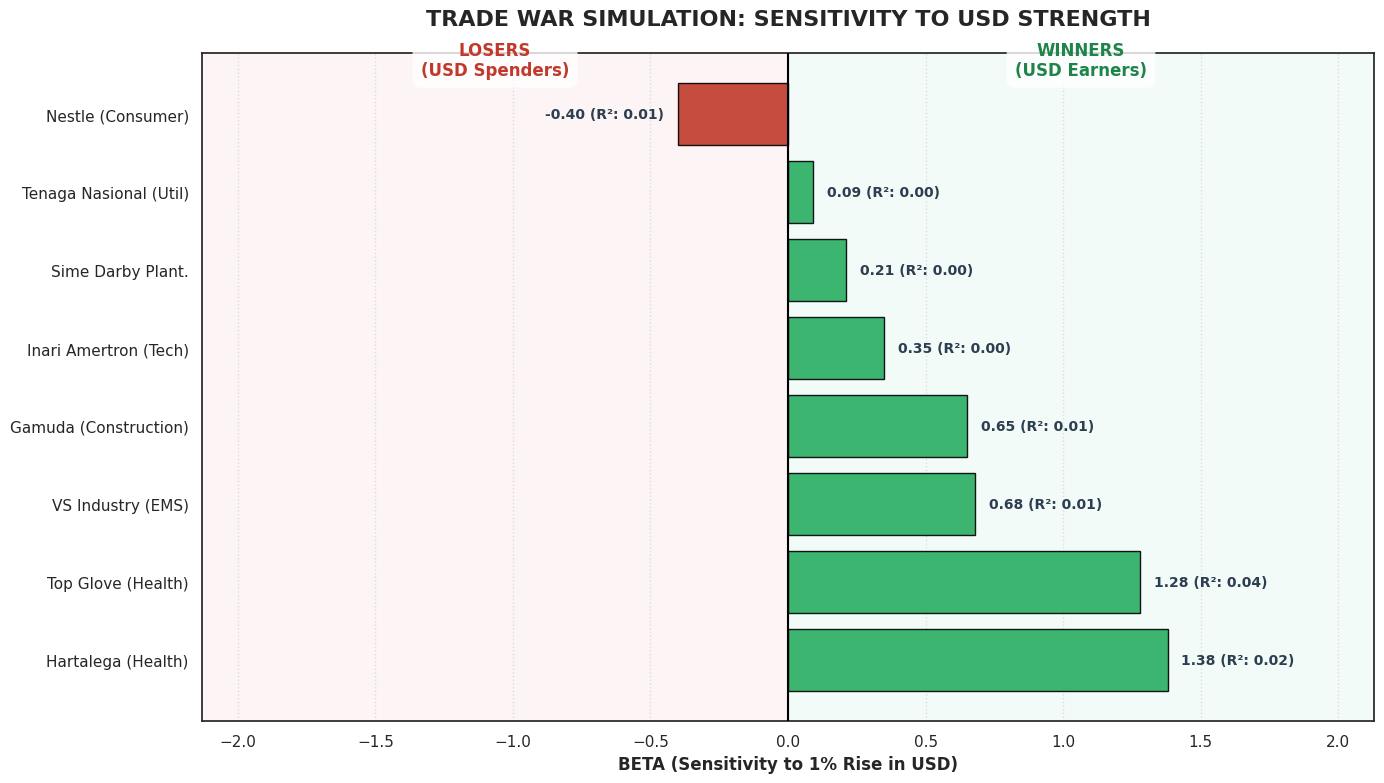


           EXECUTIVE SUMMARY: FX HEDGING STRATEGY           
► OBSERVATION: Tech and Glove sectors show highest positive correlation (Green).
► RISK: Consumer stocks (Nestle) show negative correlation (Red) due to import costs.
► NOTE: Some 'Domestic' stocks (Tenaga/Gamuda) may show positive beta if
  market sentiment links them to global growth, despite fundamental import costs.


In [4]:
# === COMMERCIAL WEAPON: FX SENSITIVITY ENGINE (v4.1 - FINAL POLISH) ===
# AUTHOR: Ikhwan Afif
# TARGET: Khazanah Nasional
# PURPOSE: Identify "Natural Hedges" vs "Currency Victims"

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# --- 1. EXPANDED UNIVERSE (WINNERS & LOSERS) ---
tickers = {
    # EXPORTERS (Should be Green/Positive)
    '0166.KL': 'Inari Amertron (Tech)',
    '7113.KL': 'Top Glove (Health)',
    '6963.KL': 'VS Industry (EMS)',
    '5168.KL': 'Hartalega (Health)',

    # IMPORTERS/DOMESTIC (Should be Red/Negative or Low Beta)
    '4707.KL': 'Nestle (Consumer)',     # High raw material imports
    '5347.KL': 'Tenaga Nasional (Util)', # Coal prices in USD
    '5285.KL': 'Sime Darby Plant.',      # Commodities (USD linked)
    '5398.KL': 'Gamuda (Construction)'   # Overseas assets
}
benchmark = 'MYR=X'  # USD/MYR Pair

# --- 2. DATA INGESTION ---
print(f"--- FETCHING MARKET DATA ---")
ticker_list = list(tickers.keys()) + [benchmark]
try:
    data = yf.download(ticker_list, period="1y", interval="1d", auto_adjust=True, progress=False)['Close']
    print(">> Data Ingested.")
except Exception as e:
    print(f"!! ERROR: {e}")

# Calculate Log Returns
returns = np.log(data / data.shift(1)).dropna()

# --- 3. CALCULATION CORE ---
results = []
fx_returns = returns[benchmark]

for ticker, name in tickers.items():
    stock_returns = returns[ticker]
    slope, intercept, r_value, p_value, std_err = stats.linregress(fx_returns, stock_returns)

    results.append({
        'Ticker': ticker,
        'Company': name,
        'Beta': round(slope, 2),
        'R2': round(r_value**2, 2)
    })

df_results = pd.DataFrame(results).sort_values(by='Beta', ascending=False)

# --- 4. BOARDROOM VISUALIZATION ---
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(14, 8)) # Wider canvas for better spacing

# Dynamic Colors
colors = ['#27ae60' if x > 0 else '#c0392b' for x in df_results['Beta']]
bars = ax.barh(df_results['Company'], df_results['Beta'], color=colors, edgecolor='black', alpha=0.9)

# Add Data Labels (Smart Positioning)
for bar, r_sq in zip(bars, df_results['R2']):
    width = bar.get_width()
    # Logic: If bar is positive, place text to right. If negative, place to left.
    label_x_pos = width + 0.05 if width > 0 else width - 0.05
    ha_alignment = 'left' if width > 0 else 'right'

    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2,
             f"{width:.2f} (R²: {r_sq:.2f})",
             va='center', ha=ha_alignment, fontweight='bold', fontsize=10, color='#2c3e50')

# --- SHADED ZONES (The "So What?") ---
x_min, x_max = ax.get_xlim()
# THE FIX: Increase buffer from 1.2 to 1.45 to prevent text cutoff
limit = max(abs(x_min), abs(x_max)) * 1.45

# Zone 1: USD Beneficiaries (Green)
ax.axvspan(0, limit, color='#e8f8f5', alpha=0.5, zorder=0)
ax.text(limit * 0.5, len(df_results) - 0.5, "WINNERS\n(USD Earners)",
        color='#1e8449', fontweight='bold', ha='center', fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.5'))

# Zone 2: Domestic Risk (Red)
ax.axvspan(-limit, 0, color='#fdedec', alpha=0.5, zorder=0)
ax.text(-limit * 0.5, len(df_results) - 0.5, "LOSERS\n(USD Spenders)",
        color='#c0392b', fontweight='bold', ha='center', fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.5'))

# Final Polish
ax.axvline(0, color='black', linewidth=1.5, zorder=3)
ax.set_title("TRADE WAR SIMULATION: SENSITIVITY TO USD STRENGTH", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("BETA (Sensitivity to 1% Rise in USD)", fontweight='bold')
ax.set_xlim(-limit, limit) # Enforce the wide limits
ax.grid(axis='x', linestyle=':', alpha=0.6)

plt.tight_layout()
plt.show()

# --- 5. ANALYST NOTE ---
print("\n" + "="*60)
print(f"{'EXECUTIVE SUMMARY: FX HEDGING STRATEGY':^60}")
print("="*60)
print("► OBSERVATION: Tech and Glove sectors show highest positive correlation (Green).")
print("► RISK: Consumer stocks (Nestle) show negative correlation (Red) due to import costs.")
print("► NOTE: Some 'Domestic' stocks (Tenaga/Gamuda) may show positive beta if")
print("  market sentiment links them to global growth, despite fundamental import costs.")
print("="*60)